In [ ]:
import numpy as np
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/data.csv')

In [ ]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
data.drop(["Unnamed: 0","Photo","Flag","Club Logo"],axis=1,inplace=True)

In [ ]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
def country(x):
    return data[data['Nationality'] == x][['Name','Overall','Potential','Position']]


#printing all players from Portugal
country('Portugal')

,Name,Overall,Potential,Position
1,Cristiano Ronaldo,94,94,ST
56,Bernardo Silva,86,91,RW
108,Pepe,85,85,RCB
114,Bruno Fernandes,84,88,LCM
120,William Carvalho,84,86,CDM
...,...,...,...,...
15350,Nuno Malheiro,59,63,LB
15577,João Virgínia,59,76,GK
15587,Paulo Alves,59,70,CM
15916,Pedro Gonçalves,58,74,CM


In [ ]:
#printing all players from a particular club 
def club(x):
    return data[data['Club'] == x][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
                                    'Value','Contract Valid Until']]

club('Juventus')

,Name,Jersey Number,Position,Overall,Nationality,Age,Wage,Value,Contract Valid Until
1,Cristiano Ronaldo,7.0,ST,94,Portugal,33,€405K,€77M,2022
15,P. Dybala,21.0,LF,89,Argentina,24,€205K,€89M,2022
24,G. Chiellini,3.0,LCB,89,Italy,33,€215K,€27M,2020
64,Alex Sandro,12.0,LB,86,Brazil,27,€160K,€36.5M,2020
65,Douglas Costa,11.0,LM,86,Brazil,27,€175K,€46.5M,2022
70,L. Bonucci,19.0,RCB,86,Italy,31,€160K,€30M,2023
72,M. Pjanić,5.0,CDM,86,Bosnia Herzegovina,28,€180K,€44M,2023
73,M. Benatia,4.0,CB,86,Morocco,31,€160K,€30M,2020
92,W. Szczęsny,1.0,GK,85,Poland,28,€125K,€32M,2021
99,S. Khedira,6.0,RCM,85,Germany,31,€160K,€33M,2021


data cleaning

In [ ]:
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

In [ ]:
data.fillna(0, inplace = True)

Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


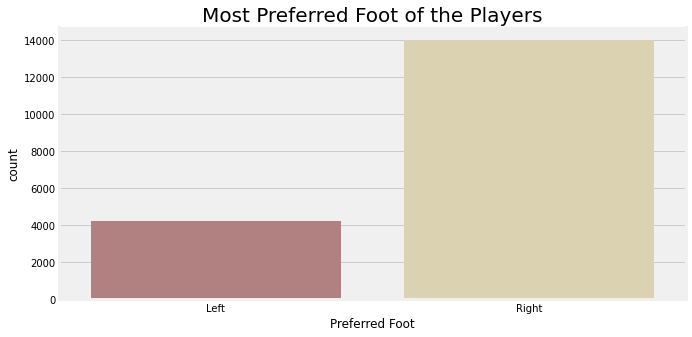

In [ ]:
# comparison of preferred foot over the different players

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


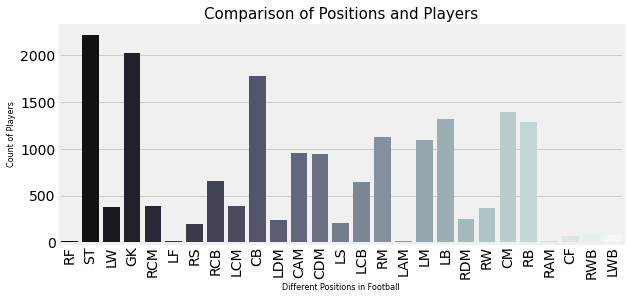

In [ ]:
plt.figure(figsize = (9,4))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 8)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 8)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

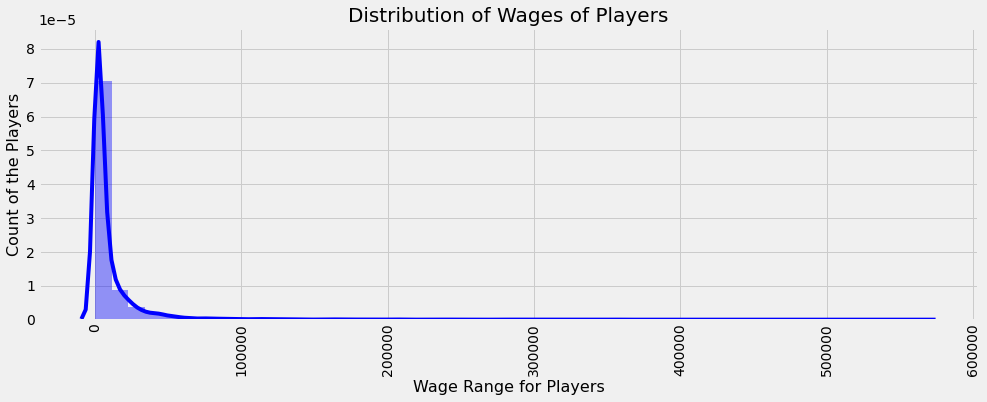

In [ ]:
def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

data['Wage'].head()

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['Wage'], color = 'blue')
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Distribution of Wages of Players', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

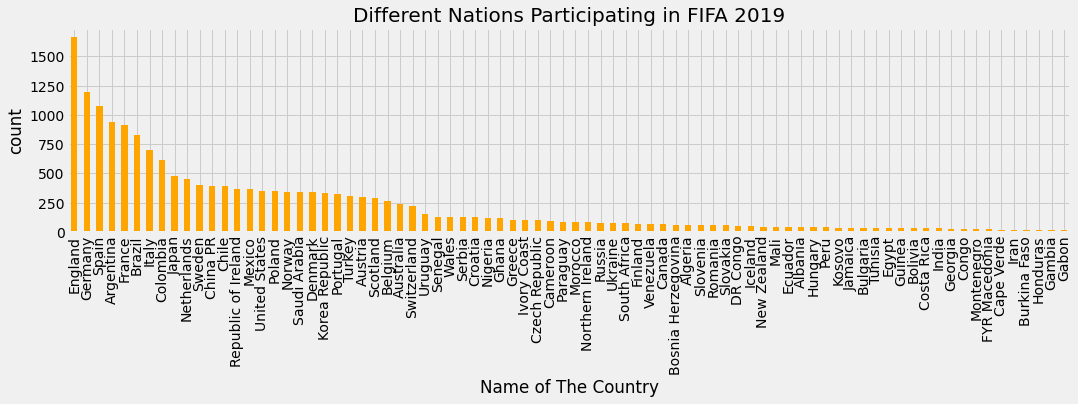

In [ ]:

data['Nationality'].value_counts().head(80).plot.bar(color = 'orange', figsize = (16,3.5))
plt.title('Different Nations Participating in FIFA 2019', fontsize = 20, fontweight = 20)
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

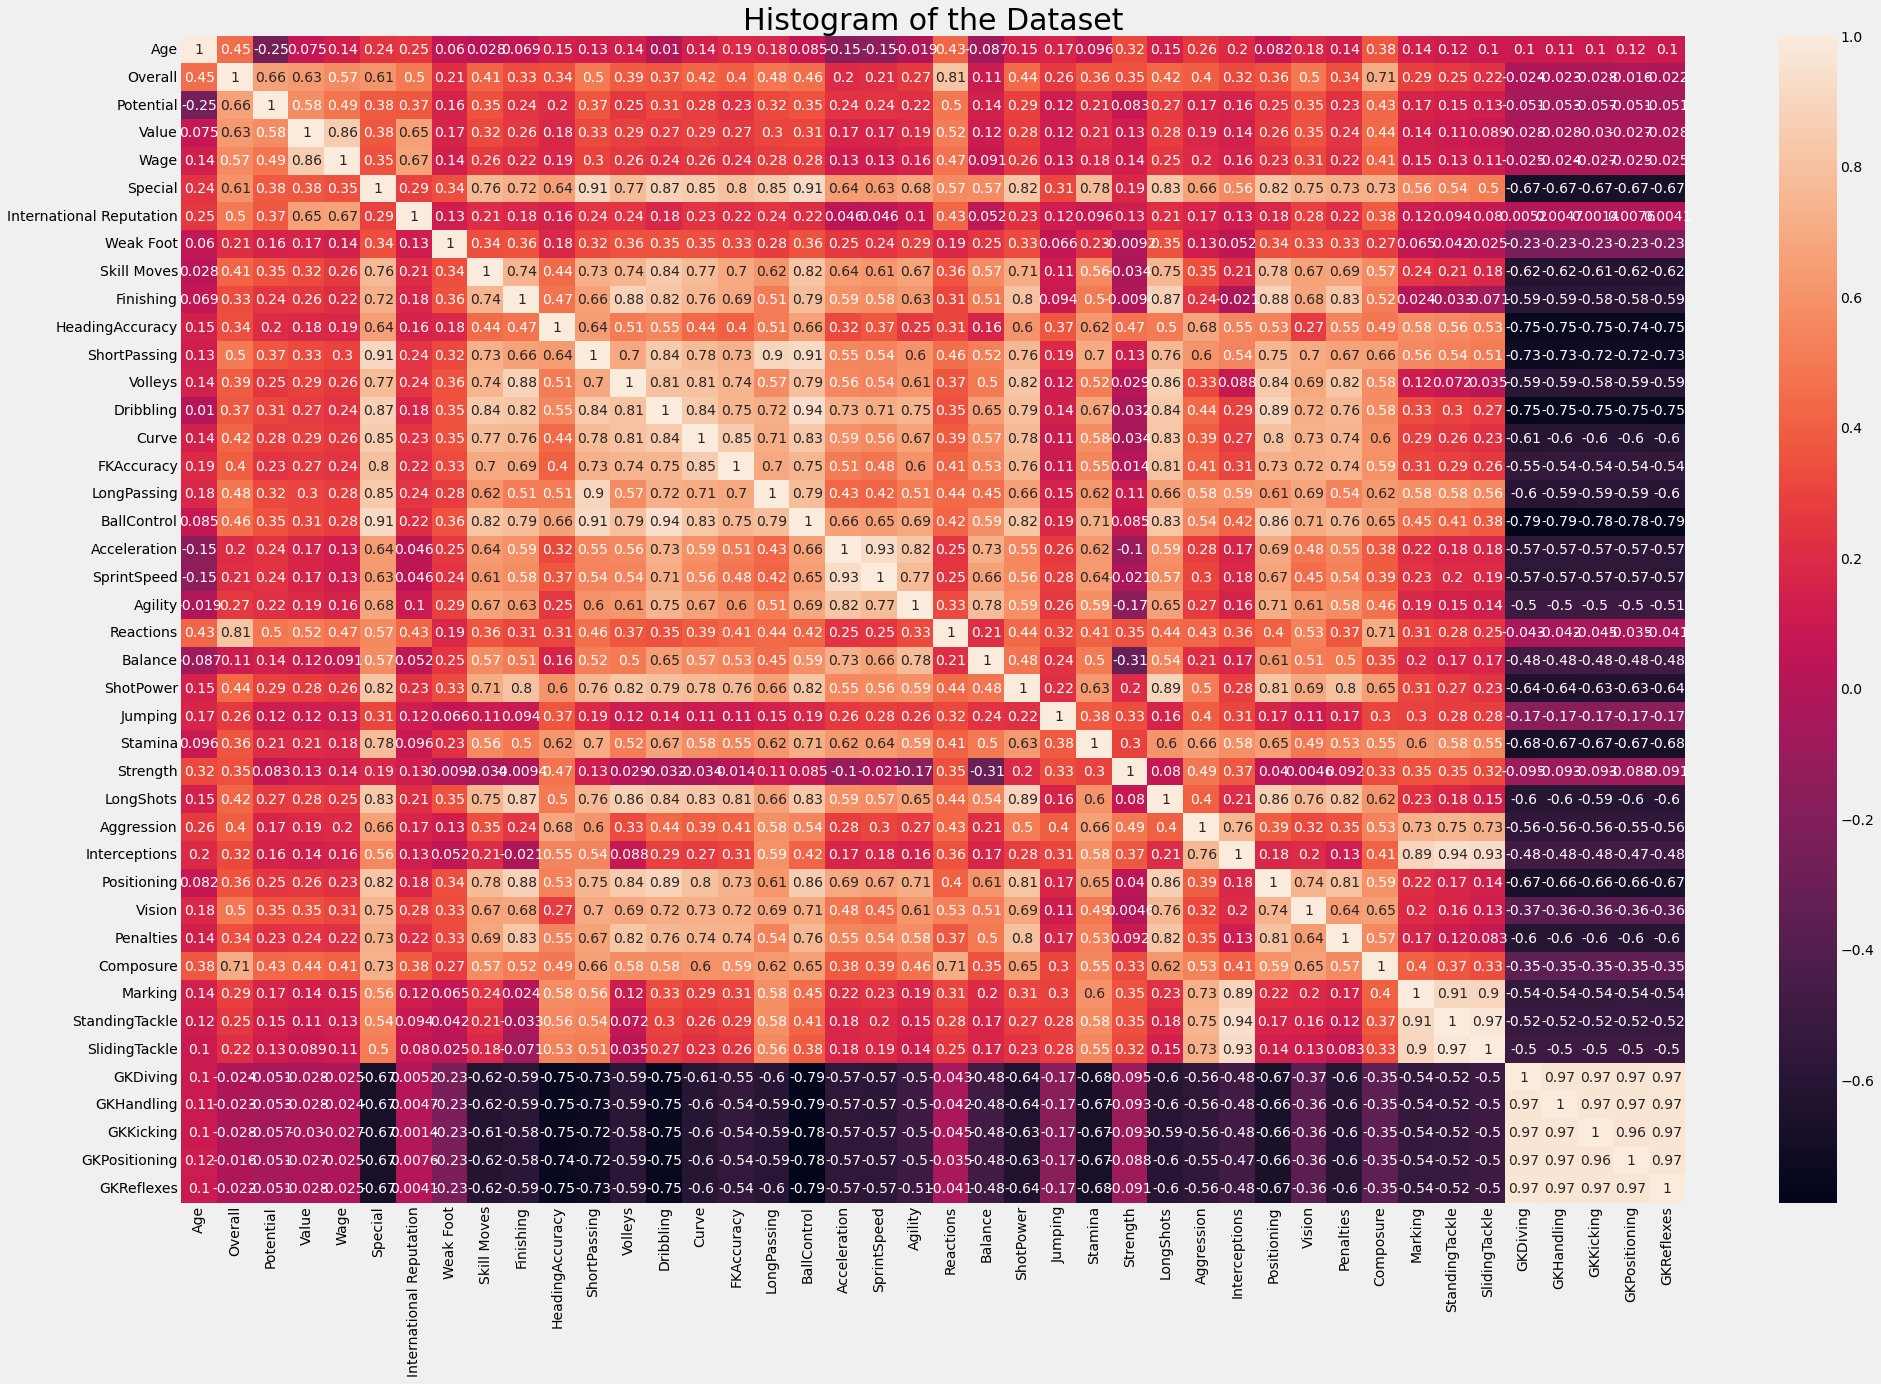

In [ ]:
# plotting a correlation heatmap
selected_columns = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

data_selected = pd.DataFrame(data, columns = selected_columns)
data_selected.columns
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data_selected[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True)

plt.title('Histogram of the Dataset', fontsize = 30)
plt.show()

Predicting GK Reflexes based on GK Diving, kicking, positioning

Performing Linear regression 

In [ ]:
#Define the independent and dependent variables
y= data['GKReflexes'] #dependent variable is price
x= data[['GKDiving','GKHandling', 'GKKicking', 'GKPositioning']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

model = LinearRegression() #Create a linear regression model
model.fit(x_train,y_train) #Fit the data

y_prediction = model.predict(x_test)

GKreflexes_pred = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_prediction}) #Cr
GKreflexes_pred



,Actual value,Predicted value
3916,11.0,11.224362
5889,7.0,10.920378
11282,11.0,9.458711
5811,11.0,10.312439
3010,15.0,12.989240
...,...,...
13445,6.0,10.752452
7283,14.0,10.815396
174,10.0,11.985260
10489,66.0,68.464824


In [ ]:
MSE = (np.sum((y_test-y_prediction)**2))/len(y_test)
print(MSE)

11.163011177005846


In [ ]:
np.sqrt(MSE)

3.3411092734308836

In [ ]:
print("r_squared value is ", model.score(x,y))

r_squared value is  0.9648349072330917
